### **Setup**

In [ ]:
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import shutil

In [ ]:
!unzip training_images.zip -d training_images

Archive:  training_images.zip
  inflating: training_images/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
  inflating: training_images/Adam_Sandler/Adam_Sandler_0002.jpg  
  inflating: training_images/Adam_Sandler/Adam_Sandler_0003.jpg  
  inflating: training_images/Adam_Sandler/Adam_Sandler_0004.jpg  
  inflating: training_images/Adam_Sandler/Adam_Sandler_test.jpg  
  inflating: training_images/Adam_Sandler/adam-sandler (1).jpg  
  inflating: training_images/Adam_Sandler/adam-sandler.jpg  
  inflating: training_images/Adam_Sandler/adam-sandler-test.jpg  
  inflating: training_images/Adam_Sandler/test (2).jpg  
  inflating: training_images/Adam_Sandler/test.jpg  
  inflating: training_images/Art_Cooper/Art_Cooper_0001.jpg  
  inflating: training_images/Art_Howe/Art_Howe_0001.jpg  
  inflating: training_images/Art_Howe/Art_Howe_0002.jpg  
  inflating: training_images/Art_Howe/Art_Howe_0003.jpg  
  inflating: training_images/Art_Howe/Art_Howe_0004.jpg  
  inflating: training_images/Art_Lopez/Art

In [ ]:
for filename in os.listdir('/content/training_images/'):
    file_path = os.path.join('/content/training_images/', filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(e)
if not os.path.exists('/content/training_images/Funny_Faces'):
    os.makedirs('/content/training_images/Funny_Faces')

In [ ]:
imgs = ['/content/jim1.PNG', '/content/jim2.PNG', '/content/jim3.PNG', '/content/jim4.PNG', '/content/jim5.PNG']
path = '/content/training_images/Funny_Faces'
ind = 0
for i in imgs:
  img = cv2.imread(i, 1)
  cv2.imwrite(os.path.join(path , 'photo{}.PNG'.format(ind)), img)
  ind += 1
  cv2.waitKey(0)

In [ ]:
DEFAULT_SIZE = [250, 250] 

def read_images(image_path='training_images', default_size=DEFAULT_SIZE):
    images = []
    labels = []
    paths = []
    directories = [image for image in os.listdir(image_path) if not image.startswith('.')]

    for image_dir in directories:
        img_path = os.path.join(image_path, image_dir)
        image_names = [image for image in os.listdir(img_path) if not image.startswith('.')]

        for image_name in image_names:
            path = os.path.join(img_path, image_name)
            image = Image.open(path)
            image = image.convert("L")
            image = image.resize(default_size, Image.ANTIALIAS)
            images.append(np.asarray(image, dtype=np.uint8))
            labels.append(image_dir)
            paths.append(path)

    return [images, labels, paths]

In [ ]:
def as_row_matrix(img):
    # empty case
    if len(img) == 0:
        return np.array([])
    # create matrix with zeros
    result_matrix = np.empty((0, img[0].size), dtype = img[0].dtype)
    # fill the matrix 
    for row in img:
        result_matrix = np.vstack((result_matrix , np.asarray(row).reshape(1, -1)))
    
    return result_matrix

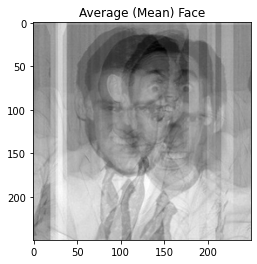

In [ ]:
[images, labels, paths] = read_images()  
average_matrix = np.reshape(as_row_matrix(images).mean(axis=0), images[0].shape)
plt.imshow(average_matrix, cmap=plt.cm.gray)
plt.title("Average (Mean) Face")
plt.show()

In [ ]:
def components(eigenvalues, variance=.95):
    for num_components, eig_val_cs in enumerate(np.cumsum(eigenvalues) / np.sum(eigenvalues)):
        if eig_val_cs > variance:
            return num_components
  
def pca(images, labels, num_components=0):
    [numrows, numcols] = images.shape

    if (num_components <= 0) or (num_components > numrows):
        num_components = numrows
        mu = images.mean(axis=0)
        images = images - mu

    if numrows > numcols:
        covariance_matrix = np.dot(images.T, images) 
        [eigenvalues, eigenvectors] = np.linalg.eigh(covariance_matrix)
    else :
        covariance_matrix = np.dot (images, images.T) 
        [eigenvalues, eigenvectors] = np.linalg.eigh(covariance_matrix)
        eigenvectors = np.dot(images.T, eigenvectors)
        for i in range (numrows):
            eigenvectors [:,i] = eigenvectors [:,i]/ np.linalg.norm( eigenvectors [:,i])

    # sort eigenvectors descending by their eigenvalue
    idx = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    num_components = components(eigenvalues)

    # select only num_components
    eigenvalues = eigenvalues[0: num_components].copy()
    eigenvectors = eigenvectors [:, 0:num_components].copy()
    return [eigenvalues, eigenvectors, mu]  

[eigenvalues, eigenvectors, mean] = pca(as_row_matrix(images), labels)

In [ ]:
eigenfaces = []
minimum = eigenvectors.shape[1]
for i in range (min(minimum, 16)):
    eface = eigenvectors[:,i].reshape(images[0].shape)
    eigenfaces.append(np.asarray(eface))

In [ ]:
def subplot(title, images, rows, cols, sptitles=[], colormap=plt.cm.gray, figsize=(10, 7)):
    fig = plt.figure(figsize = figsize)

    fig.text(.5, .95, title, horizontalalignment ="center")
    for i in range (len(images)):
        ax0 = fig.add_subplot(rows, cols, (i + 1))
        plt.setp(ax0.get_xticklabels(), visible=False)
        plt.setp(ax0.get_yticklabels(), visible=False)

        if len(sptitles) == len(images):
            plt.title(f'{str(sptitles[i])}')
        else:
            plt.title(f'{i+1}')

        plt.imshow(np.asarray(images[i]) , cmap = colormap )
    plt.show()

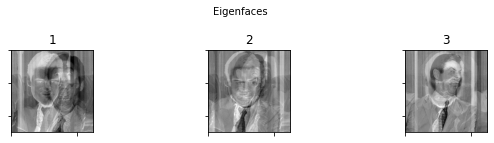

In [ ]:
      
eigenfaces = []
minimum = eigenvectors.shape[1]
for i in range (min(minimum, 16)):
    eface = eigenvectors[:,i].reshape(images[0].shape)
    eigenfaces.append(np.asarray(eface))

subplot (title ="Eigenfaces", images=eigenfaces, rows=4, cols=3, colormap=plt.cm.gray)

In [ ]:
def project(subspace, images, mu):
    return np.dot(images - mu, subspace)
    
def dist_metric(point1, point2):
    point1 = np.asarray(point1).flatten()
    point2 = np.asarray (point2).flatten()
    return np.sqrt(np.sum(np.power((point1 - point2), 2)))

def predict(subspace, mu , projections, y, images):
    min_dist = float("inf")
    minimum = -1
    proj = project(subspace, images.reshape(1 , -1), mu)
    for element in range(len(projections)):
        dist = dist_metric(projections[element], proj)
        if dist < min_dist:
            min_dist = dist
            minimum = element
    return minimum


Mode 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


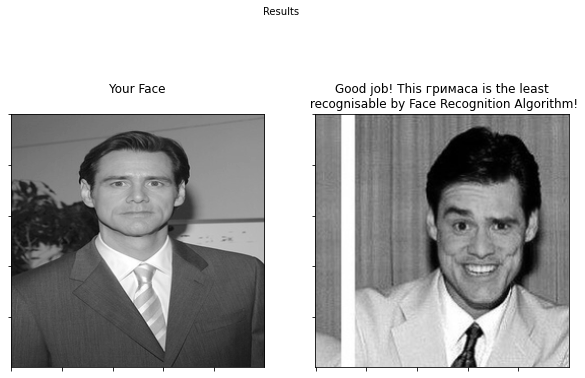

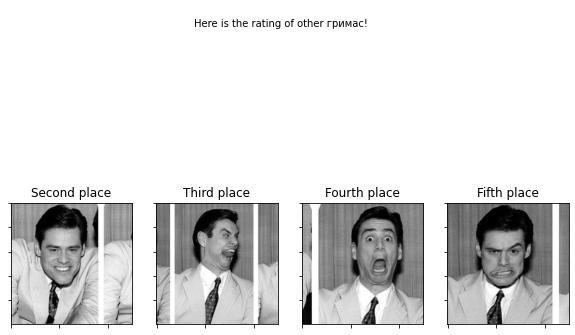

In [ ]:
image = Image.open("/content/test.jpg")
image = image.convert("L")

if (DEFAULT_SIZE is not None):
    image = image.resize (DEFAULT_SIZE, Image.ANTIALIAS)
test_image = np.asarray(image, dtype=np.uint8)
emotions = []

for i in range(5):
    [images, labels, paths] = read_images()
    [eigenvalues, eigenvectors, mean] = pca(as_row_matrix(images), labels)
    projections = []
    for xi in images:
      projections.append(project (eigenvectors, xi.reshape(1 , -1) , mean))
    predicted = predict(eigenvectors, mean , projections, labels, test_image)
    emotions.append(images[predicted])
    path_to_delete = '/content/{}'.format(paths[predicted])
    os.remove(path_to_delete)

subplot (title ="Results", images =[test_image, emotions[-1]], rows =1, cols =2, sptitles = ["Your Face\n", "\nGood job! This гримаса is the least\n recognisable by Face Recognition Algorithm!"] , colormap=plt.cm.gray)

subplot (title ="\nHere is the rating of other гримас!\n", images = emotions[:-1][::-1], rows = 1, cols = 4, sptitles = ['Second place', 'Third place', 'Fourth place', 'Fifth place'], colormap=plt.cm.gray)